  <h1><center> Discussing the Covid19 Pandemic</center></h1> 
 <h2><center>Data Loading, Cleaning and Exploratory Data Analysis </center></h2> 


**Student: Shreyas Chitransh     
Course: BrainStation DataScience and AI Bootcamp  
Project: Capstone
Notebook: Part 1 of 4    
Next Notebook: Part 2 - Tweet Exploratory Data Analysis**

## Introduction

The Covid19 pandemic swept across the world starting in March 2020 and continuing throughout the time this report was generated in June 2021.This is the first time that the world not only saw a lot of fear, grief and sadness but also some of the best solidarity amongst the global citizens. It would be fascinating to see what the masses were discussing during all this. This project will analyze Twitter data from the first major surge of global Covid19 cases, namely March/April 2020. It specifically aims to use Topic Modeling incorporating the Latent Dirichlet Allocation model, and generate a summary list of topics being discussed by the mass English speaking Twitter users.

The dataset being utilized for the analysis was collected by <a href="https://www.kaggle.com/smid80">Shane Smith</a> in March and April 2020 and can be found on <a href="https://www.kaggle.com/smid80/coronavirus-covid19-tweets-early-april">here for early April</a> and <a href="https://www.kaggle.com/smid80/coronavirus-covid19-tweets-late-april">here for late April</a> on kaggle. The collection, which started on 29th March 2020, consists of all Tweets from users who used the following hashtags: `#coronavirus`, `#coronavirusoutbreak`, `#coronavirusPandemic`, `#covid19`, `#covid_19`, `#epitwitter`, `#ihavecorona`. It should be noted that from 11 April onwards, two additional hashtags, namely `#StayHomeStaySafe`, `#TestTraceIsolate`, have also been added into the Tweet collection set. 

The report will start by [importing the dataset and exploring](#1) the basic characteristics of it. This will be followed by [cleaning the data](#2) which will primarily consist of removing/imputing duplicates and null values. The next step is to conduct an [Exploratory Data Analysis (EDA)](#3) to understand the final cleaned dataset. The EDA will assist with [creating a subset dataset](#11) that will be more manageable for our scope of the project. In part 2 of the project, a Tweet text EDA will be conducted which will further assist us in text preprocessing to build and enhance the models in parts 3 and 4.


## Importing  <a id="1"></a>

The first step is to import all modules and libraries which will be used throughout this notebook.

In [1]:
# Import the relevant libraries and modules which will be utilized in the overall report
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
# Hide warnings that appear with logistic regression without updating Scikit-learn
import warnings
warnings.filterwarnings('ignore')

The data will now be imported using a `for` loop. All the filenames are formatted in the same way throughout:
"{date} Coronavirus Tweets.csv", where the different dates are the prefix. Hence, a list of the dates has been generated and used in the loop to import each file. The imported files are appended to an empty list called `df_list`.

In [2]:
#Import the files into a dataset using a for loop

# List of all the dates for csv files
dates = ['2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
         '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
         '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
         '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
         '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30']

# Initiate empty list where the imported data will be appended
df_list = []

# Generate and run the for loop to read in the files and append them to the empty list
for date in dates:
    print(fr'data\{date} Coronavirus Tweets.csv')
    read= pd.read_csv(fr'data\{date} Coronavirus Tweets.csv')
    df_list.append(read)

data\2020-03-29 Coronavirus Tweets.csv
data\2020-03-30 Coronavirus Tweets.csv
data\2020-03-31 Coronavirus Tweets.csv
data\2020-04-01 Coronavirus Tweets.csv
data\2020-04-02 Coronavirus Tweets.csv
data\2020-04-03 Coronavirus Tweets.csv
data\2020-04-04 Coronavirus Tweets.csv
data\2020-04-05 Coronavirus Tweets.csv
data\2020-04-06 Coronavirus Tweets.csv
data\2020-04-07 Coronavirus Tweets.csv
data\2020-04-08 Coronavirus Tweets.csv
data\2020-04-09 Coronavirus Tweets.csv
data\2020-04-10 Coronavirus Tweets.csv
data\2020-04-11 Coronavirus Tweets.csv
data\2020-04-12 Coronavirus Tweets.csv
data\2020-04-13 Coronavirus Tweets.csv
data\2020-04-14 Coronavirus Tweets.csv
data\2020-04-15 Coronavirus Tweets.csv
data\2020-04-16 Coronavirus Tweets.csv
data\2020-04-17 Coronavirus Tweets.csv
data\2020-04-18 Coronavirus Tweets.csv
data\2020-04-19 Coronavirus Tweets.csv
data\2020-04-20 Coronavirus Tweets.csv
data\2020-04-21 Coronavirus Tweets.csv
data\2020-04-22 Coronavirus Tweets.csv
data\2020-04-23 Coronavir

Below the dataframe is being generated as a singular `complete_df` by concatenating the `df_list` which contains all the imported data from the files above.

In [3]:
# generate a completed merged dataframe from the appended list of data by concatenating it
complete_df = pd.concat(df_list)

## Exploring the Dataset

Broadly speaking this involves looking at the first few rows and the structure of the dataset, any summary statistics for the numerical columns and missing values in all columns and rows. The data structure can give information about the data types which might have to be changed or columns that need to be split or joined for more effective use.

The broad exploration of the dataset will now be conducted by looking at the data and its structure. First, the `.head()` function will be used to look at the first few lines of the dataset.

In [4]:
# Visualize the first few rows of the dataframe
complete_df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te automediques. #PrevenciónCoronavirus #Coronavirus #COVID19 https://t.co/IgB2izYi1p",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1008,41,NaN,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,"#ATENCIÓN En el Terminal Nuevo Circo se implementan medidas como el uso de la mascarilla por parte de usuari@s y conductores que hacen vida en dichas instalaciones, parte de los esfuerzos unificad...",TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,90,316,NaN,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,"“People are just storing up. They are staying at home freezing things. I talk to dealers around the state and out of the area, they are all out of freezers,” said owner Frank Mertz.\n\nhttps://t.c...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,136,457,NaN,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta a tus beneficiarios ante el #IMSS, ahora lo puedes hacer desde tu domicilio a través de internet y evita filas | #SanaDistancia\n#QuédateEnCasa \n#Co...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1549,170,NaN,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada ante el #Coronavirus #COVID19 ¡inscríbete! https://t.co/HhuRe1r7Wo,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,868,125,NaN,2016-10-19T22:05:03Z,False,es


It is clear from the above dataframe that there are 22 columns in the dataset. Several of them contain missing values, represented as "NaN". 

### Dataframe Structure
More exploration of the data is needed to identify the overall structure and data types for the columns in the dataset. First the index of the dataset will be reset to ensure proper continuity of index values. This is especially necessary because the data was concatenated from different files and any of them could have index value errors. 

In [5]:
# Resetting the index for the dataframe
complete_df = complete_df.reset_index(drop = True)

The `.info()` function will be used to confirm the success of index reset and get more insights on the dataframe structure.  

In [6]:
# Get a concise summary of the dataframe
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14607013 entries, 0 to 14607012
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   status_id             int64  
 1   user_id               int64  
 2   created_at            object 
 3   screen_name           object 
 4   text                  object 
 5   source                object 
 6   reply_to_status_id    float64
 7   reply_to_user_id      float64
 8   reply_to_screen_name  object 
 9   is_quote              bool   
 10  is_retweet            bool   
 11  favourites_count      int64  
 12  retweet_count         int64  
 13  country_code          object 
 14  place_full_name       object 
 15  place_type            object 
 16  followers_count       int64  
 17  friends_count         int64  
 18  account_lang          float64
 19  account_created_at    object 
 20  verified              bool   
 21  lang                  object 
dtypes: bool(3), float64(3), int64(6), object

The `complete_df` contains 22 columns and over 14.6 milllion rows which are properly indexed from 0 to 14,607,012. The data types for the columns consist of object, integer, float and boolean.

### Data Dictionary <a id="10"></a>
The information that each column provides is generally taken from  <a href="https://support.birdiq.net/knowledge-base/twitter-tweet-columns/#:~:text=The%20unique%20identifier%20for%20this%20Tweet.&text=The%20actual%20text%20of%20the%20Tweet.&text=Utility%20(e.g.%2C%20iPhone%2C%20Android,used%20to%20post%20the%20Tweet.">BirdIQ here </a> and is given below:
 - `status_id`: A unique identification number associated with the Tweet;
 - `user_id`: A unique identification number associated with the user generating the Tweet;
 - `created_at`: The date on which the Tweet was generated;
 - `screen_name`: The user name of the user generating the Tweet;
 - `text`: The actual text of the Tweet;
 - `source`: Utility (e.g. Web client etc.) used to post the Tweet;
 - `reply_to_status_id`: If the represented Tweet is a reply, this will contain the original Tweet’s ID;
 - `reply_to_user_id`: If the represented Tweet is a reply, this will contain the original Tweet’s author ID;
 - `reply_to_screen_name`: If the represented Tweet is a reply, this will contain the screen name of the original Tweet’s author;
 - `is_quote`: Indicates whether this Tweet is a quote or not;
 - `is_retweet`: Indicates whether this Tweet has been retweeted by the authenticating user;
 - `favourites_count`: Approximate number of times the original Tweet has a 'like' by a Twitter user;
 - `retweet_count`: The number of times this Tweet has been retweeted;
 - `country_code`: The shortened country code representing the country containing the place;
 - `place_full_name`: Short human-readable representation of the place’s name this Tweet is associated with but not necessarily originating from;
 - `place_type`: The type of location represented by this place;
 - `followers_count`: The number of 'followers' this account currently has;
 - `friends_count`: The number of users this account is following;
 - `account_lang`: The language code for the user’s self-declared user interface language;
 - `account_created_at`: The UTC date and time that the user account was created on Twitter;
 - `verified`: Whether an account of public interest is verified by Twitter to be authentic;
 - `lang`: Language identifier corresponding to the machine-detected language of the Tweet text.


The columns were  compared to the output from the head() function to check whether the data types correspond correctly. The 3 columns given below seem to have an incorrect data type:
-  The `created_at` column is `object` type but should be in the `datetime` dtype instead.  
-  The `account_created_at` column is `object` type but should be in the `datetime` dtype instead.
- The `account_lang` column is `float` type which does not seem correct, however all the visible values are null and cannot be verified just yet.

<a id="7"></a>
This information will help to clean the data in the next section of the report. 


 
Below, the `.describe()` function will be used to look at the various summary statistics for the dataset. The method looks at any numerical columns and gives some summary statistics such as the mean, standard deviation (std) and inter-quartile range among others. These statistics can give a wholistic view of what's contained in each column.
 <a id="8"></a>

In [7]:
# Use the describe function to gain an understanding of numerical columns in the dataframe
complete_df.describe()

,status_id,user_id,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,followers_count,friends_count,account_lang
count,1.460701e+07,1.460701e+07,1.745080e+06,2.111183e+06,1.460701e+07,1.460701e+07,1.460701e+07,1.460701e+07,0.0
mean,1.249520e+18,3.368818e+17,1.248857e+18,2.328203e+17,1.174802e+04,3.580968e+00,6.501909e+04,2.048379e+03,NaN
std,3.504127e+15,4.959153e+17,1.523071e+16,4.331340e+17,3.962682e+04,6.731740e+01,5.543002e+05,1.111902e+04,NaN
min,1.244052e+18,1.200000e+01,2.000000e+01,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.246356e+18,1.673920e+08,1.246142e+18,5.098209e+07,2.110000e+02,0.000000e+00,1.490000e+02,1.510000e+02,NaN
50%,1.249251e+18,1.248759e+09,1.249004e+18,3.632403e+08,1.550000e+03,0.000000e+00,8.650000e+02,5.040000e+02,NaN
75%,1.252542e+18,8.758339e+17,1.252294e+18,3.502392e+09,7.645000e+03,1.000000e+00,4.783000e+03,1.449000e+03,NaN
max,1.256010e+18,1.256007e+18,1.256010e+18,1.255996e+18,1.995152e+06,5.132900e+04,8.374142e+07,2.129084e+06,NaN


When using the `.describe()` method one has to be careful because it gives the statistical summary of all numeric columns, whether it makes sense or not. In the case above, there are statistics associated with the `status_id`, `user_id` columns even though they are just codes. This is also the case with `reply_to_status_id` and `reply_to_user_id` columns as they give the identification number for the Tweet being replied to and the identification number of the user who generated the Tweet respectively. Furthermore, it has already been confirmed earlier that the `account_lang` column is completely null. Therefore all of these columns can be ignored in terms of summary statistic analysis. 

For the remaining relevant columns, the analysis of the summary statistics is given below.

The `favourites_count` column shows that on average the Tweets get ~11,748 'likes', however a median (50th percentile) of just 1550 indicates that the mean value is likely affected by either outliers that contain very high 'like' counts or a long tail towards high 'like' counts.

The `retweet_count` column shows that on average the Tweets are retweeted ~3.5 times. The median of 0 associated with this column verifies that retweets are uncommon.

The `followers_count` column shows that on average the accounts associated with the Tweets have ~65,019 'followers'. However a median of just 865 indicates that the mean value is likely affected by either outliers of users with very high number of 'followers' or a long tail towards high 'follower' counts. This is confirmed by the max 'follower' count of 83,741,420 in the dataframe.

The `friends_count` column shows that on average the account associated with the Tweet, follows ~2,048 other accounts. A median of 504 indicates that the mean value is likely close to accurate and is not affected by too many outliers. However, the max is still very high at 2,129,084.


Now the above information can be used to clean the data in the next section.


## Cleaning the Data <a id="2"></a>

The whole cleaning process is key to the data science workflow as it can ensure that the quality of the input data is up to par. We will be removing duplicates and null values as well as columns which are not relevant for the analysis. After all, we are familiar with the old adage "Garbage in, garbage out" and that's what we're avoiding. 


### Duplicate Rows
The data cleaning will start by checking for any duplicate rows in the dataset.   

In [8]:
# Looking at the total number of duplicated rows
complete_df.duplicated().sum()

672

The result indicates that the dataset contains 672 duplicated rows. It is almost assured that these are genuine duplicates as there is a huge variability in information for each row of data. However, it can be ensured by checking one of the indexes for the duplicated rows below. 

In [9]:
# generating the variable which contains the index of the duplicated rows
duplicated = complete_df[complete_df.duplicated()].index
duplicated

Int64Index([     159,    20417,    20426,    49713,    55552,    55553,
               61753,   102944,   112413,   154198,
            ...
            14452547, 14492549, 14492550, 14519585, 14527388, 14550650,
            14572342, 14584642, 14586300, 14605346],
           dtype='int64', length=672)

The first index value is picked from above and the rows around it checked to ensure that the duplicates are being picked correctly.

In [10]:
# Using iloc to check the rows near the duplicated index
complete_df.iloc[150:161,:]

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
150,1244051669362438144,273842391,2020-03-29T00:00:05Z,2536luis,(Opinion) Covid-19 will change us as a species ••• 🌏🌍🌎 \n#CoronavirusOutbreak #COVID19\n#coronavirus https://t.co/o3lC2ha2KY,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,4140,3754,NaN,2011-03-29T08:13:28Z,False,en
151,1244051668280446977,608235166,2020-03-29T00:00:05Z,1055WDUV,Keep ordering takeout and keep local business open - but be safe.\n\n#WDUV #DoveNews #OpeninTampaBay #takeout #foodsafety #FDA #stopthespread #saferathome #washyourhands #covid19 #coronavirus #vir...,SocialNewsDesk,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,2895,4592,NaN,2012-06-14T15:23:54Z,True,en
152,1244051668867506176,1208463505654812672,2020-03-29T00:00:05Z,5Krunner1972,#Covid_19 #Coronavirustruth #TrumpGenocide #WorstPresidentEver # https://t.co/31y7Rqp6cz,Twitter for iPhone,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,49,372,NaN,2019-12-21T19:06:16Z,False,und
153,1244051668699951106,880962856467877888,2020-03-29T00:00:05Z,ScienceNerdSam,💔 The measures we take to stay safe during this #Covid_19 pandemic is not about you. It’s not about taking your freedoms. It’s not a set-up. It’s not a form of population control. #COVIDIOT https:...,Twitter for iPad,NaN,NaN,NaN,True,...,1,NaN,NaN,NaN,645,674,NaN,2017-07-01T01:34:47Z,False,en
154,1244051665642192896,3064266184,2020-03-29T00:00:05Z,techjunkiejh,Doors slam shut across borderless Europe as #coronavirus spreads https://t.co/laCNjh2Eay #CoronaVtj https://t.co/sSfYQNoMQA,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,28982,25081,NaN,2015-02-27T00:58:22Z,False,en
155,1244051665449357313,81081065,2020-03-29T00:00:05Z,cronicaglobal,Domingo de #PensamientoPolítico en @LetraGlobal. @mmcias explica en un estupendo análisis los motivos por los que esta crisis del #coronavirus supone el ocaso de Occidente y sus libertades en favo...,Comitium5 BAB,NaN,NaN,NaN,False,...,4,NaN,NaN,NaN,36603,7453,NaN,2009-10-09T10:52:57Z,True,es
156,1244051669064744962,579624080,2020-03-29T00:00:05Z,RadioInfluence,"On the latest #DarkToLight, @PoliticalOrgy &amp; @tracybeanz of @UncoverDC discuss the Stimulus package &amp; also what benefit this has for the American people, listen to some TRUTH coming out fr...",Hootsuite Inc.,NaN,NaN,NaN,False,...,7,NaN,NaN,NaN,22536,59,NaN,2012-05-14T06:53:30Z,False,en
157,1244051666623762432,152142811,2020-03-29T00:00:05Z,TelemundoNews,"En época de pandemia, los empleados temporales que sí han podido venir están improvisando medidas caseras para protegerse del #coronavirus ante la inacción de sus empleadores.\n\nhttps://t.co/frFK...",SocialFlow,NaN,NaN,NaN,False,...,10,NaN,NaN,NaN,758786,908,NaN,2010-06-05T05:22:50Z,True,es
158,1244051666623762432,152142811,2020-03-29T00:00:05Z,TelemundoNews,"En época de pandemia, los empleados temporales que sí han podido venir están improvisando medidas caseras para protegerse del #coronavirus ante la inacción de sus empleadores.\n\nhttps://t.co/frFK...",SocialFlow,NaN,NaN,NaN,False,...,10,NaN,NaN,NaN,758810,908,NaN,2010-06-05T05:22:50Z,True,es
159,1244051665642192896,3064266184,2020-03-29T00:00:05Z,techjunkiejh,Doors slam shut across borderless Europe as #coronavirus spreads https://t.co/laCNjh2Eay #CoronaVtj https://t.co/sSfYQNoMQA,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,28982,25081,NaN,2015-02-27T00:58:22Z,False,en


We can see the row 159 is a duplicate of row 154. However it is also obvious that row 160 is also a duplicate of row 155 and similarly 158 a duplicate of 157. However 160 and 158 are not present in the duplicated index values above. 
The duplicated method works by comparing all the columns in a row against the other rows, this means that the other rows are not present due to some difference in the other columns.

Upon further examination we can see that the `followers_count` and `friends_count` columns seem to hold different values for the duplicated Tweet. However we know it's still a duplicated Tweet as the `status_id` column is the same. Therefore it's likely that the data was scraped 2 or more times, but between the scraping, the friends or 'followers' count changed. 

It would be better to look for duplicated Tweets using the `status_id` column as each Tweet has a unique identifier for that. This is done below.  

In [11]:
# Checking index of duplicated rows based on status_id column alone 
complete_df[complete_df.duplicated(['status_id'])].index

Int64Index([     158,      159,      160,    20417,    20426,    49713,
               55552,    55553,    61753,   102944,
            ...
            14492549, 14492550, 14519585, 14527379, 14527388, 14550650,
            14572342, 14584642, 14586300, 14605346],
           dtype='int64', length=799)

We can see that now the other indexes that we identified (158 and 160) are also present. Overall the number of duplicates based on Tweet `status_id` are 799. Let's drop these below and reset the index to ensure continuation.

In [12]:
# Removing duplicate rows and resetting the index of the dataframe
complete_df = complete_df.drop_duplicates(subset = ['status_id']).reset_index(drop=True)

Let's ensure that the duplicates are dropped by rechecking the duplicates below.

In [13]:
# Checking index of duplicated rows based on status_id column again to ensure all duplicates have been removed 
complete_df[complete_df.duplicated(['status_id'])].index

Int64Index([], dtype='int64')

As evidenced by the result above, the dataset doesn't contain any more duplicates. Now let's check the null data in order to clean it.

### Null Data
The first step will involve checking for the total null values for `complete_df`. 

In [14]:
# Displaying the sum of null rows in each column
complete_df.isna().sum()

status_id                      0
user_id                        0
created_at                     0
screen_name                    2
text                           0
source                        83
reply_to_status_id      12861242
reply_to_user_id        12495162
reply_to_screen_name    12495162
is_quote                       0
is_retweet                     0
favourites_count               0
retweet_count                  0
country_code            13949529
place_full_name         13946921
place_type              13946921
followers_count                0
friends_count                  0
account_lang            14606214
account_created_at             0
verified                       0
lang                           0
dtype: int64

Below, the values will be calculated in terms of percentages. This is because a column wise percentage gives a good representation of how much data is missing from each column. A function is defined, called `na_pct()`, to calculate these percentages as there are several steps later when this calculation is required. 

In [15]:
# Defining a function to take the sum of total null values for each column and dividing 
# it by the total number of rows in the column. 
# This is multiplied by 100 to turn the values into percentages and the output returned by the function.
def na_pct(df):
    """
    The function takes a dataframe and outputs the percent of null values per column. 

    """
    # testing that only dataframes are given as inputs
    assert isinstance(df, pd.core.frame.DataFrame), "Please input a dataframe as a parameter."   
    
    # Defining the nulls variable with the calculation
    nulls = ((df.isnull().sum()/df.shape[0])*100)

    # Returning the variable generated
    return nulls

Let's call the function below using our dataframe

In [16]:
# Calling the na_pct function on our dataframe 
na_pct(complete_df)

status_id                 0.000000
user_id                   0.000000
created_at                0.000000
screen_name               0.000014
text                      0.000000
source                    0.000568
reply_to_status_id       88.053222
reply_to_user_id         85.546891
reply_to_screen_name     85.546891
is_quote                  0.000000
is_retweet                0.000000
favourites_count          0.000000
retweet_count             0.000000
country_code             95.504071
place_full_name          95.486216
place_type               95.486216
followers_count           0.000000
friends_count             0.000000
account_lang            100.000000
account_created_at        0.000000
verified                  0.000000
lang                      0.000000
dtype: float64

As seen above, 9 columns out of the 22 contain missing values. Out of those, 7 columns contain over 85% missing values and cannot be imputed, hence the columns will have to be removed. 
It is normally considered acceptable to remove rows with missing values, if it affect less than 3% of the dataset, while assuming that the values are on mutually exclusive rows. The remaining 2 columns with less missing data, namely 'screen_name' and 'source', contain 0.000014% and 0.000568% missing values respectively. As this is less than 3%, we can safely remove the rows containing the missing data while cleaning in the next section of the report.

The missing data needs to be 'cleaned' by either removing it or imputing it with reasonable values. 

The [exploration earlier](#7) shows that some columns contain really high null values and need to be removed as they won't add any value to the analysis. These columns are:
- `reply_to_status_id`;
- `reply_to_user_id`;
- `reply_to_screen_name`;
- `country_code`;
- `place_full_name`;
- `place_type`;
- `account_lang`.

These will be removed below from the original dataframe and the earlier equation used to identify the percentage of missing data per column in the final dataset. The `.drop()` function is used to drop the columns chosen, with the 'axis=1' parameter used to indicate that a column is being dropped rather than a row. The `na_pct()` function is used to verify that the columns have been dropped and to check which other columns need cleaning.

In [17]:
# Dropping the mentioned columns
complete_df = complete_df.drop(['reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
                                'country_code', 'place_full_name', 'place_type', 'account_lang'], axis=1)

# Calling the na_pct function on our dataframe to check the updated results  
na_pct(complete_df)

status_id             0.000000
user_id               0.000000
created_at            0.000000
screen_name           0.000014
text                  0.000000
source                0.000568
is_quote              0.000000
is_retweet            0.000000
favourites_count      0.000000
retweet_count         0.000000
followers_count       0.000000
friends_count         0.000000
account_created_at    0.000000
verified              0.000000
lang                  0.000000
dtype: float64

As the columns are now successfully removed, the next step is to remove the rows with missing data in the `screen_name` and `source` columns. The `.dropna()` function is used to drop the rows with missing data, with the 'axis=0' parameter used to indicate that a row is being dropped rather than the column. The earlier function will be used again to calculate the percentage of missing data in each column.

In [18]:
# Dropping the columns containing null values 
complete_df = complete_df.dropna(axis=0)

# Calling the na_pct function on our dataframe to check the updated results  
na_pct(complete_df)

status_id             0.0
user_id               0.0
created_at            0.0
screen_name           0.0
text                  0.0
source                0.0
is_quote              0.0
is_retweet            0.0
favourites_count      0.0
retweet_count         0.0
followers_count       0.0
friends_count         0.0
account_created_at    0.0
verified              0.0
lang                  0.0
dtype: float64

Above, it is confirmed that there are no more missing values in any of the columns, including `screen_name` and `source`.


In the next step, only the columns relevant for the Exploratory Data Analysis will be kept. All the remaining will be dropped. The relevant columns chosen by the author are:
 - `created_at` : The date of the Tweet creation can assist in giving a temporal overview to the analysis;
 - `screen_name` : The screen name may come of use if an entity analysis is undertaken in the report;
 - `text` : The text is one of the most important features for the topic modeling on Twitter;
 - `is_retweet`: This may come in use for the EDA to find out how many Tweets are actually original compared to retweets;
 - `favourites_count`: This can help in finding out which Tweets are most liked by the users;
 - `retweet_count`: This column is another indication of which Tweets are being retweeted by others and are hence popular; 
 - `followers_count`: Can be used in conjunction with favourites and 'followers' count to see whether these aspects bear a relationship to Tweets being famous;
 - `friends_count`: Can be used to check whether there is a relationship of Tweet popularity with number of accounts followed;
 - `verified`: Can assist in entity recognition if that analysis path is undertaken later;
 - `lang`: Can give a great overview of the distribution of languages being used which are talking about Covid-19.
 
 The reason for removing the other columns is given below:
 - `status_id` : Doesn't add value as no analysis on the Tweet ID is being conducted;
 - `user_id` : Doesn't add value as no analysis on the User ID is being conducted;
 - `source` : The source of the Tweet is of no relevance to the analysis;
 - `is_quote`: Whether the Tweet is a quote or not, bears no relevance to the analysis;
 - `account_created_at`: The account creation date of the author is not being analyzed in this report. 
 

Now the irrelevant columns will be removed and the dataframe checked to ensure the removal was successful. 

In [19]:
# Dropping the columns which are no longer required
complete_df = complete_df.drop(['status_id', 'user_id', 'source', 'is_quote', 'account_created_at'], axis=1)

# Checking the info for the remaining datafame
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606129 entries, 0 to 14606213
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   created_at        object
 1   screen_name       object
 2   text              object
 3   is_retweet        bool  
 4   favourites_count  int64 
 5   retweet_count     int64 
 6   followers_count   int64 
 7   friends_count     int64 
 8   verified          bool  
 9   lang              object
dtypes: bool(2), int64(4), object(4)
memory usage: 1.0+ GB


The last step for cleaning the data is converting the `created_at` column into a `datetime` type. 
The sample of the dataframe is displayed below to have a look at what the column currently contains.

In [20]:
# Checking a sample of 10 rows from the dataset
complete_df.sample(10)

,created_at,screen_name,text,is_retweet,favourites_count,retweet_count,followers_count,friends_count,verified,lang
3847991,2020-04-04T16:56:47Z,denysergushkin,Nature rests from people during #coronavirus https://t.co/8ITom2pVWO,False,4900,0,826,1779,False,en
8547864,2020-04-15T19:35:01Z,RazaQur7,"@thakursahab_20 @CMOGuj @PradipsinhGuj @vijayrupanibjp @AmitShah @SushantBSinha Arre yaar kaha mene support kiya hai unhe aur kaha gov ko blame kiya hai, simple hai, kuch bhi, In the End everyone ...",False,530,0,6,214,False,hi
4493974,2020-04-06T03:54:00Z,lasillarota,#LoMasLeido Spring breakers dan positivo a #coronavirus tras viajar a Los Cabos y a pesar de recomendaciones https://t.co/SfJ0kT1IU3,False,11749,19,404305,3663,True,es
296246,2020-03-29T15:22:35Z,doctorcma,Adani group donates 100 cr to PM Cares Fund\n\n#Covid19 https://t.co/SBk2EaAi5A,False,8290,0,209,538,False,en
6160367,2020-04-09T11:00:44Z,avpluma,"🚑 Últimos datos sobre el #coronavirus: \n\nExtremadura registra 12 fallecidos en las últimas 24 horas. Así, se elevan a 283 los muertos en la región desde el inicio de la pandemia. Hay 89 nuevos p...",False,1252,0,6285,1187,False,es
1440414,2020-03-31T12:22:12Z,nilimnetz,Wer kümmert sich um gestrandete Menschen aus Deutschland mit Aufenthaltstitel? Das @AuswaertigesAmt oder sind sie auf sich selbst gestellt? Wir haben mal nachgeforscht. @KoehlerEva @ph_reporterpoo...,False,1191,8,406,1158,False,de
13828147,2020-04-28T21:46:45Z,WhiteSpir1t,@bennyjohnson Seems ironic for them that their own people are losing confidence of their communist propaganda lately. Now they’re sowing their seeds early starting with children. #CCPVirus #Corona...,False,78588,0,5689,6254,False,en
5039266,2020-04-07T01:02:02Z,sergiolinix,Sua Maestà in prima linea contro il #COVID19 https://t.co/haJgXAiw8d,False,32758,0,728,1114,False,it
4286389,2020-04-05T17:00:19Z,Sebasti01464362,Iglesia Catolica en Panamá no respeta la cuarentena ya ven porq el país centroamericano es el Numero uno percapita de enfermos y muertos por el #coronavirus @CNNEE @el_pais @Telemundo @MariaCelest...,False,1896,0,25,280,False,es
9481617,2020-04-17T15:09:17Z,TextingBase,#textingbase helping to save restaurants...order through text and pick up in your car safely #covi̇d19 https://t.co/xHn7eJKkCT,False,900,0,15307,13777,False,en


The dataframe above shows that the `created_at` column contains a string of date, followed by 'T' and a time in 24 hour format. The overall string ends in a 'Z'. The column will be converted into a datetime dtype using python's built-in function `to_datetime`. This will be checked by calling the `.info()` function.

In [21]:
# Converting the column to datetime format
complete_df["created_at"] = pd.to_datetime(complete_df["created_at"])

# Checking the info method for dataframe to ensure the conversion
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606129 entries, 0 to 14606213
Data columns (total 10 columns):
 #   Column            Dtype              
---  ------            -----              
 0   created_at        datetime64[ns, UTC]
 1   screen_name       object             
 2   text              object             
 3   is_retweet        bool               
 4   favourites_count  int64              
 5   retweet_count     int64              
 6   followers_count   int64              
 7   friends_count     int64              
 8   verified          bool               
 9   lang              object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 1.0+ GB


As can be seen above, the `created_at` column is in the `datetime` dtype. Now that all the dataset is clean and in the correct datatype, the dataset is ready for an EDA.


## Exploratory Data Analysis  <a id="3"></a>

**Getting a Basic Understanding from the Cleaned Data**  
After cleaning the data, we need to start understanding it. While there are some quantitative techniques for EDA, majority of the methods involve making graphical visualisations to understand the following: 
1. Any basic structures or trends in the data
2. Important variables within the data
3. Outliers and anomalies for numerical columns 
4. Obvious relationships between features of the dataset.

The dependency on graphical EDA methods is because humans have an innate ability to gain insights from patterns. We utilize this pattern recognition ability to explore the entire dataset and shine a light on any subtle structural insights, which will likely be less obvious with numerical analysis alone. 

The dataset contains data from many different languages. The total number of languages in the dataset will be obtained using the code below where the number of unique languages are calculated in the `lang` column. 

In [22]:
# Checking the number of languages in the dataset
len(complete_df.value_counts("lang").unique())

66

There are a total of 66 unique languages in the dataset. The distribution for the Tweet counts in each language is plotted below. 

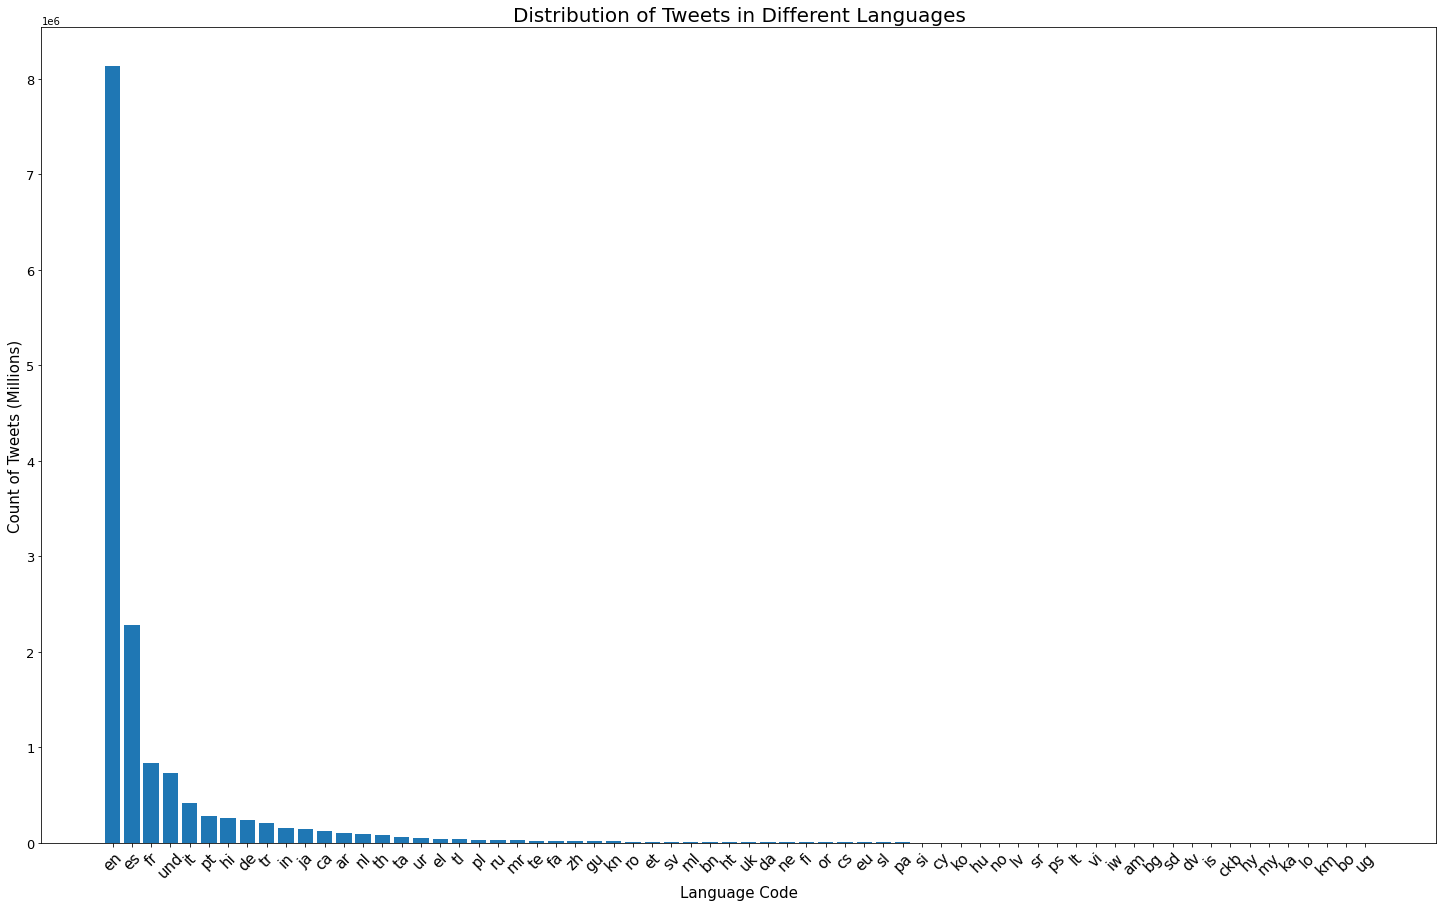

In [23]:
# Instantiate the plot 
plt.figure(figsize=(25,15))

# Plot the bar chart using lang column index and the counts of each index in the column
plt.bar(x = complete_df.value_counts("lang").index, height = complete_df.value_counts("lang"))

# Making the plot more comprohensive
plt.title('Distribution of Tweets in Different Languages', size = 20)
plt.ylabel("Count of Tweets (Millions)", size = 15)
plt.xlabel("Language Code", size = 15)
plt.yticks(size = 13)
plt.xticks(rotation = 45, size = 15)

plt.show()

It is clear that the most prevalent Tweet language in the dataset is English. This is followed by Spanish and French, which even together make less than half of the English Tweet count. As this analysis involves Natural Language Processing, it is decided that only the English Tweets will be analyzed. The counts below specify that there are over 8 million English Tweets which will be utilized for the analysis. 

In [24]:
# Calculating the count of Tweets in different languages
complete_df.value_counts("lang")

lang
en     8133232
es     2277747
fr      833554
und     727499
it      421432
        ...   
ka          92
lo          46
km          39
bo           7
ug           5
Length: 66, dtype: int64

A new dataframe is created below, which only contains the data for the English Tweets.

In [25]:
# Creating a dataframe with only the English Tweets
df_eng = complete_df[complete_df['lang'] == 'en']

As the rows for the data are selected based on the language, it is highly unlikely that the index of the new dataframe will be correct. Therefore the index for `df_eng` will be reset below.

In [26]:
# Doing an index reset on the new dataframe
df_eng = df_eng.reset_index(drop=True)

It is pertinent to check that the dataframe is generated correctly. As the data is a subset of a dataframe with no missing rows, this aspect of df_eng does not need to be checked. However, the structure and the successful implementation of a new index has to be checked using the `.info()` method below. 

In [27]:
# Checking the structure of the new dataframe using info()
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8133232 entries, 0 to 8133231
Data columns (total 10 columns):
 #   Column            Dtype              
---  ------            -----              
 0   created_at        datetime64[ns, UTC]
 1   screen_name       object             
 2   text              object             
 3   is_retweet        bool               
 4   favourites_count  int64              
 5   retweet_count     int64              
 6   followers_count   int64              
 7   friends_count     int64              
 8   verified          bool               
 9   lang              object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 511.9+ MB


It is confirmed that the dataset contains the correct information. There are 2 boolean, 1 datetime, 4 integer and 3 object columns. As all the Tweets are now in English, the `lang` column is redundant. Therefore it will be dropped.

In [28]:
# Dropping the Tweet language column from the dataframe 
df_eng = df_eng.drop(['lang'], axis=1)

Below, it is confirmed that the `lang` column is successfully dropped as its not part of the column list in `df_eng`. 

In [29]:
# Ensuring that only the relevant columns are remaining
df_eng.columns

Index(['created_at', 'screen_name', 'text', 'is_retweet', 'favourites_count',
       'retweet_count', 'followers_count', 'friends_count', 'verified'],
      dtype='object')

Below, the `.describe()` function will be used to look at the various summary statistics for the `df_eng` dataset. These statistics can give a wholistic view of what's contained in each column. 

In [30]:
# Checking the summary statistics of the dataframe
df_eng.describe()

,favourites_count,retweet_count,followers_count,friends_count
count,8.133232e+06,8.133232e+06,8.133232e+06,8.133232e+06
mean,1.295832e+04,3.366869e+00,6.422953e+04,2.328850e+03
std,3.914671e+04,7.013224e+01,6.230024e+05,1.231287e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.640000e+02,0.000000e+00,1.520000e+02,1.700000e+02
50%,1.843000e+03,0.000000e+00,8.460000e+02,5.750000e+02
75%,8.874000e+03,1.000000e+00,4.226000e+03,1.704000e+03
max,1.995152e+06,3.440700e+04,8.374142e+07,1.599416e+06


The above results will also be compared with the `complete_df` statistics that were [calculated earlier in the report](#8) 

1. The `favourites_count` column shows that on average the English Tweets get ~12,958 'likes', however a median (50th percentile) of just 1843 indicates that the mean value is likely affected by either outliers that contain very high 'like' counts or a long tail towards high 'like' counts.
Compared with `complete_df` mean (11,748) and median (1,550), the `df_eng` values are higher, however not by too much. It is safe to say that the English Tweets receive more 'likes' than average.  


2. The `retweet_count` column shows that on average the English Tweets are retweeted ~3.3 times. The median of 0 associated with this column verifies that retweets are uncommon. Compared to the `complete_df` mean of ~3.5, the `df_eng` values are lower. This means that on average English Tweets are retweeted less. However the difference is not very big.


3. The `followers_count` column shows that on average the accounts associated with the Tweets have ~64,229 'followers'. However a median of just 846 indicates that the mean value is likely affected by either outliers of users with very high number of 'followers' or a long tail towards high 'follower' counts. This is confirmed by the max 'follower' count of 83,741,420 in the dataframe. Compared to the `complete_df` mean of ~65,019, the `df_eng` values are lower. This means that on average, the users who Tweet in English have fewer number of 'followers', though only marginally.


4. The `friends_count` column shows that on average the account associated with the Tweet, follows ~2,328 other accounts. A median of 575 indicates that the mean value is likely close to accurate and is not affected by too many outliers. Compared to the `complete_df` mean of ~2,048, the `df_eng` values are higher, however not by too much. It is safe to say that the users who Tweet in English follow more accounts than average.


### Generating a Manageable Subset Dataset  <a id="11"></a>

As the current dataset is too large to process, a smaller subset of the data will be chosen to work through the NLP project. To choose a fair temporal representation of the overall data, every 100th index value of `df_eng` will be taken to generate the `analysis_df`.

In [31]:
# Choosing every 100th row based on the index for the new dataframe
# The slicing method looks for row index values which are perfectly divisible by 100 and slices on that basis. 
analysis_df = df_eng[df_eng.index % 100 == 0]

# Reset the index of the overwritten dataset
analysis_df.reset_index(drop = True, inplace=True)

Let's check the structure of `analysis_df` below. 

In [32]:
# Checking the structure of the new dataframe using info()
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81333 entries, 0 to 81332
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        81333 non-null  datetime64[ns, UTC]
 1   screen_name       81333 non-null  object             
 2   text              81333 non-null  object             
 3   is_retweet        81333 non-null  bool               
 4   favourites_count  81333 non-null  int64              
 5   retweet_count     81333 non-null  int64              
 6   followers_count   81333 non-null  int64              
 7   friends_count     81333 non-null  int64              
 8   verified          81333 non-null  bool               
dtypes: bool(2), datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 4.5+ MB


As we can see, the ~8.1 million row dataset is now ~81,000 rows.  The index values also seem to be correctly reset and all 9 columns are present. 
Let's output this as a csv file so it can be loaded in the next part of the report where the data will be preprocessed. 

In [33]:
# Exporting the dataframe as a csv 
# Please change the directory name to your directory followed by 'Chitransh_Shreyas_Capstone\2_Tweet_Exploratory_Data_Analysis\data\ analysis_df.csv'
analysis_df.to_csv(r'C:\Users\shch9\Documents\Courses\Brainstation\Capstone\Project\Chitransh_Shreyas_Capstone\data\analysis_df.csv')

## Data Loading, Cleaning and Exploratory Data Analysis Conclusion

In this section all the data was imported. The original dataframe contained over 14 million rows and 22 columns. The data was explored to and a [Data Dictionary](#10) created to understand what each of the columns contained. Some [statistical exploration](#8) was done which assisted identifying the trends behind Tweet propogation as well as columns with high null values. The data was then [cleaned](#2) by removing duplicate rows as well as columns and rows with high null values. Finally, an [EDA](#3) was performed which assisted us in making a more manageable [subset dataset](#11). 

The next parts of the report will have the Tweet text EDA (part 2), which will assist us in text preprocessing for building and enhancing the models in parts 3 and 4.